# 2. Reproduce the original model

In [2]:
import pandas as pd

In [3]:
suppressMessages({
library(lavaan)
library(semPlot)
library(semTools)
library(MVN)
library(Hmisc)
})

In [4]:
data.raw <- read.csv('../data/WB_BGD_201805.csv')
data <- subset(data.raw, year >= 1986 & year <= 2015)
data.log <- log(data)

In [5]:
summary(data)
order = c('ISG', 'TO', 'TI', 'P_GDP', 'EI')
cor(data, use='pairwise')[order, order]

      year           ISG              TO            P_GDP       
 Min.   :1986   Min.   :20.05   Min.   :16.69   Min.   : 227.4  
 1st Qu.:1993   1st Qu.:22.86   1st Qu.:22.93   1st Qu.: 293.2  
 Median :2000   Median :23.92   Median :28.30   Median : 401.6  
 Mean   :2000   Mean   :24.07   Mean   :30.56   Mean   : 498.8  
 3rd Qu.:2008   3rd Qu.:25.90   3rd Qu.:39.48   3rd Qu.: 597.1  
 Max.   :2015   Max.   :28.15   Max.   :48.11   Max.   :1210.2  
                                                                
       EI               TI       
 Min.   :0.2049   Min.   : 93.0  
 1st Qu.:0.3205   1st Qu.:138.0  
 Median :0.3463   Median :291.0  
 Mean   :0.3513   Mean   :239.2  
 3rd Qu.:0.4179   3rd Qu.:317.5  
 Max.   :0.4893   Max.   :354.0  
 NA's   :1                       

,ISG,TO,TI,P_GDP,EI
ISG,1.0000000,0.9327355,0.7972720,0.8715645,-0.8552086
TO,0.9327355,1.0000000,0.8417575,0.8757430,-0.9187085
TI,0.7972720,0.8417575,1.0000000,0.6928933,-0.7820815
P_GDP,0.8715645,0.8757430,0.6928933,1.0000000,-0.9492223
EI,-0.8552086,-0.9187085,-0.7820815,-0.9492223,1.0000000


In [6]:
model.naive <- 'EI ~ ISG + TO + TI + P_GDP'
model.naive.fit <- lm(model.naive, data=data.log)
summary(model.naive.fit)
AIC(model.naive.fit)
BIC(model.naive.fit)


Call:
lm(formula = model.naive, data = data.log)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05058 -0.01766  0.00164  0.01890  0.05243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.38449    0.43939   3.151  0.00432 ** 
ISG          0.30369    0.18454   1.646  0.11287    
TO           0.05433    0.07902   0.688  0.49834    
TI           0.03439    0.02427   1.417  0.16945    
P_GDP       -0.62350    0.03685 -16.919 7.68e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02855 on 24 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9852,	Adjusted R-squared:  0.9827 
F-statistic: 399.2 on 4 and 24 DF,  p-value: < 2.2e-16


[1] -117.4418

[1] -109.238

In [22]:
model.path <- '
## path model
EI ~ p_ei_isg*ISG + p_ei_to*TO + p_ei_ti*TI + p_ei_pgdp*P_GDP
TI ~ p_ti_isg*ISG
P_GDP ~ p_pgdp_to*TO
## indirect effect
p_ei_ti_isg := p_ei_ti*p_ti_isg
p_ei_pgdp_to := p_ei_pgdp*p_pgdp_to
## total effect
p_ei_isg_total := p_ei_isg + (p_ei_ti*p_ti_isg)
p_ei_to_total := p_ei_to + (p_ei_pgdp*p_pgdp_to)
'

capture <- function(expr, file) {
    writeLines(c('\\begin{verbatim}', 
                 capture.output(expr),
                 '\\end{verbatim}'), con=file)
}
model.path.fit <- sem(model.path, data=data.log, estimator='ML', meanstructure=TRUE)
capture(summary(model.path.fit, standardized=TRUE, header=TRUE,  fit.measures=TRUE, estimates=FALSE),
        '../tex/plots/model.path.fit.summary.tex')
capture(summary(model.path.fit, standardized=TRUE, header=FALSE, estimates=TRUE),
        '../tex/plots/model.path.fit.estimates.tex')
summary(model.path.fit, standardized=TRUE, fit.measures=TRUE)

lavaan 0.6-5 ended normally after 61 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         12
                                                      
                                                  Used       Total
  Number of observations                            29          30
                                                                  
Model Test User Model:
                                                      
  Test statistic                                12.732
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.005

Model Test Baseline Model:

  Test statistic                               226.802
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.955
  

In [23]:
model.path.fit.fiml <- sem(model.path, data=data.log, estimator='ML', missing='FIML', meanstructure=TRUE)
capture(summary(model.path.fit.fiml, standardized=TRUE, header=TRUE,  fit.measures=TRUE, estimates=FALSE),
        '../tex/plots/model.path.fit.fiml.summary.tex')
capture(summary(model.path.fit.fiml, standardized=TRUE, header=FALSE, estimates=TRUE),
        '../tex/plots/model.path.fit.fiml.estimates.tex')
summary(model.path.fit.fiml, standardized=TRUE, fit.measures=TRUE)

Warning message in lav_model_hessian(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING: Hessian is not fully symmetric. Max diff = 1.06448313451218e-05”


lavaan 0.6-5 ended normally after 64 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         12
                                                      
  Number of observations                            30
  Number of missing patterns                         2
                                                      
Model Test User Model:
                                                      
  Test statistic                                14.849
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.002

Model Test Baseline Model:

  Test statistic                               226.218
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.945
  Tucker-Lewis Index (TLI)            

In [27]:
soln.std <- as.data.frame(standardizedSolution(model.path.fit, type='std.all', remove.def=FALSE))
soln.std

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EI,~,ISG,0.12842398,0.076783916,1.6725375,9.441837e-02,-0.022069728,0.27891769
EI,~,TO,0.08293692,0.093525271,0.8867862,3.751940e-01,-0.100369239,0.26624309
EI,~,TI,0.07257781,0.038559621,1.8822231,5.980573e-02,-0.002997660,0.14815328
EI,~,P_GDP,-1.22991644,0.062097956,-19.8060695,0.000000e+00,-1.351626200,-1.10820668
TI,~,ISG,0.80047348,0.054994817,14.5554349,0.000000e+00,0.692685623,0.90826134
P_GDP,~,TO,0.93966019,0.016242382,57.8523630,0.000000e+00,0.907825701,0.97149467
EI,~~,EI,0.01459472,0.004400238,3.3168027,9.105391e-04,0.005970414,0.02321903
TI,~~,TI,0.35924220,0.088043785,4.0802676,4.498389e-05,0.186679553,0.53180485
P_GDP,~~,P_GDP,0.11703874,0.030524639,3.8342382,1.259540e-04,0.057211543,0.17686593


In [34]:
%get soln.std --from R
df = soln_std.query('(lhs != rhs) & (op in ("~",":="))')
df

Variable soln.std is put to SoS as soln_std


,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
0,EI,~,ISG,0.128424,0.076784,1.672538,0.094418,-0.022070,0.278918
1,EI,~,TO,0.082937,0.093525,0.886786,0.375194,-0.100369,0.266243
2,EI,~,TI,0.072578,0.038560,1.882223,0.059806,-0.002998,0.148153
3,EI,~,P_GDP,-1.229916,0.062098,-19.806070,0.000000,-1.351626,-1.108207
4,TI,~,ISG,0.800473,0.054995,14.555435,0.000000,0.692686,0.908261
5,P_GDP,~,TO,0.939660,0.016242,57.852363,0.000000,0.907826,0.971495
17,p_ei_ti_isg,:=,p_ei_ti*p_ti_isg,0.058097,0.031401,1.850175,0.064288,-0.003447,0.119641
18,p_ei_pgdp_to,:=,p_ei_pgdp*p_pgdp_to,-1.155704,0.062524,-18.484089,0.000000,-1.278249,-1.033158
19,p_ei_isg_total,:=,p_ei_isg+(p_ei_ti*p_ti_isg),0.186521,0.071935,2.592890,0.009517,0.045530,0.327511
20,p_ei_to_total,:=,p_ei_to+(p_ei_pgdp*p_pgdp_to),-1.072767,0.070820,-15.147791,0.000000,-1.211571,-0.933962


      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-9.920e-02 -3.000e-08  0.000e+00  6.120e-03  8.749e-04  1.125e-01 

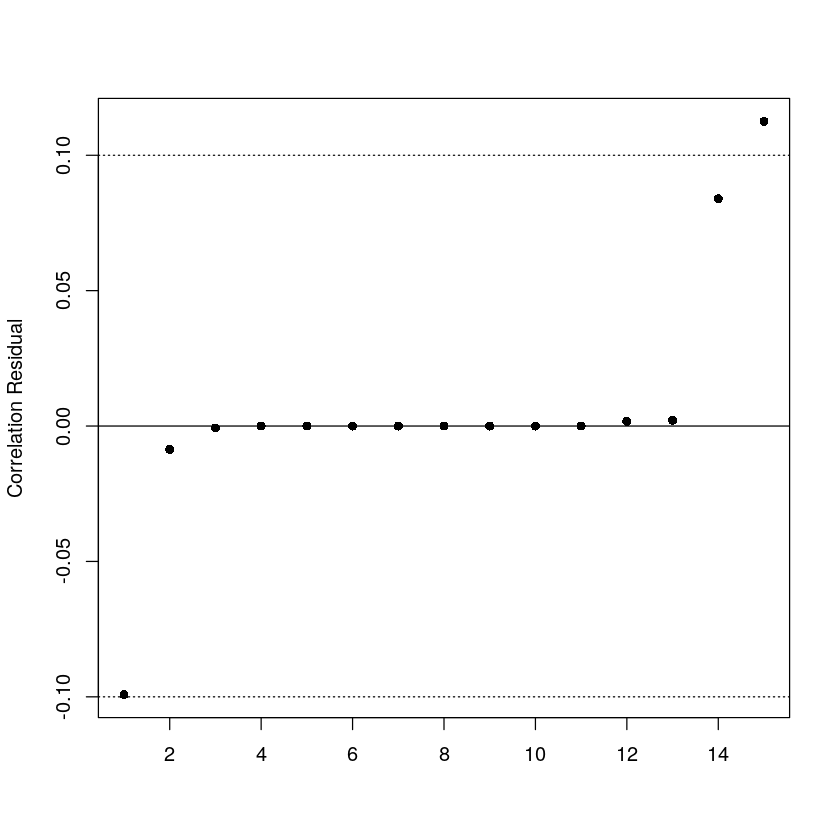

In [11]:
# Extract unique correlation residuals
fitCorResiduals <- resid(model.path.fit, type='cor')$cov
fitCorResidualsUnique <- fitCorResiduals[lower.tri(fitCorResiduals, diag=TRUE)]

summary(fitCorResidualsUnique)

plot(fitCorResidualsUnique[order(fitCorResidualsUnique)], pch=16,
     xlab='', ylab='Correlation Residual')
abline(h=c(0, -.1, .1), lty=c(1,3,3)) 

In [12]:
summary(lm(data.log$P_GDP ~ residuals_lavaan(model.path.fit)$P_GDP))
plot(data.log$P_GDP, residuals_lavaan(model.path.fit)$P_GDP)

ERROR: Error in model.frame.default(formula = data.log$P_GDP ~ residuals_lavaan(model.path.fit)$P_GDP, : variable lengths differ (found for 'residuals_lavaan(model.path.fit)$P_GDP')


In [ ]:
varTable(model.path.fit)

In [ ]:
resid(model.path.fit, type='raw')
resid(model.path.fit, type='cor')
resid(model.path.fit, type='normalized')
